In [31]:
# sorting
# python has built in sort funcs, but np's are faster accross the board

import numpy as np

x = np.array([5,4,2,3,1,5,4])
np.sort(x)

array([1, 2, 3, 4, 4, 5, 5])

In [32]:
# you can also sort in place, this writes the sort to x automatically

x.sort()
print(x)

[1 2 3 4 4 5 5]


In [33]:
# np.argsort() returns the indices of the sorted elements

x = np.array([5,4,2,3,1,5,4])
i = np.argsort(x) # creates array of indices in order by value

x[i] # x at i will return values in order

array([1, 2, 3, 4, 4, 5, 5])

In [38]:
# sorting by axis

x1 = np.random.randint(5, size=(4,4))

print(np.sort(x1, axis=0)) #column sort
print("\n")
print(np.sort(x1, axis=1)) #row sort

[[0 1 1 0]
 [1 3 2 2]
 [2 4 3 2]
 [4 4 3 3]]


[[3 3 4 4]
 [1 1 1 2]
 [0 2 3 3]
 [0 2 2 4]]


In [46]:
# partitioning: np.partition for finding the n smallest items in an array
# this will front load them in the array
# note: this will not sort them, just group/partition

x2 = np.random.randint(10, size=(7,7))

In [50]:
np.partition(x2, 4, axis=0) #sorted by columns

array([[3, 2, 1, 0, 3, 2, 2],
       [1, 3, 1, 2, 2, 4, 3],
       [0, 0, 5, 2, 5, 5, 1],
       [4, 0, 6, 4, 5, 6, 5],
       [5, 4, 7, 6, 7, 6, 5],
       [6, 6, 7, 9, 8, 7, 5],
       [7, 6, 9, 9, 8, 8, 7]])

In [57]:
# creating a series of coordinates

X = np.random.random((10,2))
X

array([[0.74031317, 0.69471996],
       [0.99045596, 0.77078635],
       [0.37791433, 0.88494052],
       [0.24982574, 0.81505023],
       [0.53666516, 0.00721805],
       [0.71110832, 0.70607516],
       [0.9504958 , 0.0728133 ],
       [0.28872047, 0.23160824],
       [0.76476435, 0.68912717],
       [0.10909104, 0.21679856]])

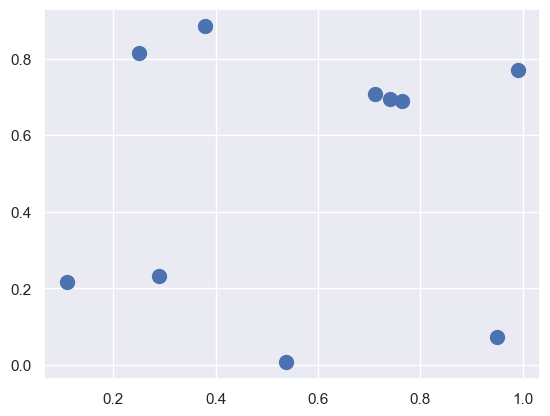

In [58]:
# graphing them out with matplotlib

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling

plt.scatter(X[:, 0], X[:, 1], s=100);

In [59]:
# here is the maths equation for squared distance between two points

dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [62]:
dist_sq.shape

(10, 10)

In [63]:
# this checks to make sure that the equation above is correct,
# as the distance between each point and itself is 0.

dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [70]:
nearest = np.argsort(dist_sq)
nearest

array([[0, 8, 5, 1, 2, 3, 7, 6, 4, 9],
       [1, 8, 0, 5, 2, 6, 3, 7, 4, 9],
       [2, 3, 5, 0, 8, 1, 7, 9, 4, 6],
       [3, 2, 5, 0, 8, 7, 9, 1, 4, 6],
       [4, 7, 6, 9, 0, 8, 5, 3, 1, 2],
       [5, 0, 8, 1, 2, 3, 7, 6, 4, 9],
       [6, 4, 8, 0, 5, 7, 1, 9, 2, 3],
       [7, 9, 4, 3, 5, 0, 2, 8, 6, 1],
       [8, 0, 5, 1, 2, 3, 6, 7, 4, 9],
       [9, 7, 4, 3, 2, 5, 0, 8, 6, 1]])

In [65]:
# technically, all we need is the nearest K number of neighbors
# so we don't have to sort the entire array

K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

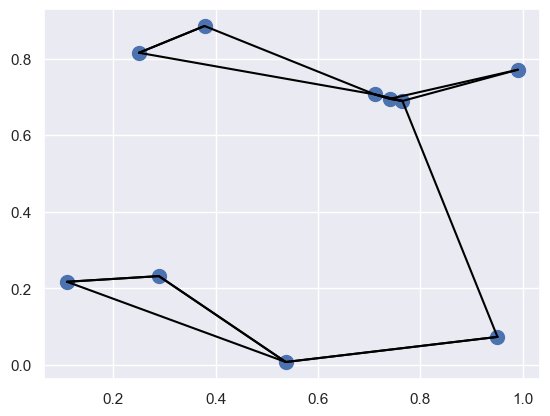

In [67]:
# this part does have me **quite** lost tbh.

plt.scatter(X[:, 0], X[:, 1], s=100)

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

In [ ]:
# this is indeed a lot of mental gymnastics :-0